In [1]:
from importlib import import_module
import tensorflow as tf
import keras
from keras.api._v2 import keras as KerasAPI
keras: KerasAPI = import_module("tensorflow.keras")
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import plot_model

from keras.utils import load_img
from keras.utils import img_to_array

import os

from sklearn.preprocessing import LabelEncoder

2.10.0


In [2]:
path = ''
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/deepLearningAs3/'

pathfinal = path + 'model_history/'
pathload = path + 'resultModel/'

epoch_val = 10000
batch_size_val = 1
threshold_val = 1e-4

random_state_global = 42
learning_rate_val = 1e-3
momentum_val = 0.9

Hidden_layer_I_N = 16
Hidden_layer_II_N = 16
Hidden_layer_III_N = 16
Hidden_layer_IV_N = 16
Output_layer_N = 5

Hidden_layer_Activation = "tanh"
Output_layer_Activation = "softmax"

ema_momentum_val = 0.99 # beta
epsilon_val = 1e-8
beta_1_val = 0.9
beta_2_val = 0.999

i = 'a'
ii = 'a'
iii = 'a'
iv = 'a'
v = 'a'
vi = 'a'
vii = 'a'
al = 'a'

epoch_val_a = epoch_val
batch_size_val_a = batch_size_val

epoch_val_b = 30000
batch_size_val_b = 11385 # df_train.shape[0] # 11385

epoch_val_c = epoch_val
batch_size_val_c = batch_size_val

epoch_val_d = epoch_val
batch_size_val_d = batch_size_val

epoch_val_e = epoch_val
batch_size_val_e = batch_size_val

epoch_val_f = epoch_val
batch_size_val_f = batch_size_val

epoch_val_g = epoch_val
batch_size_val_g = batch_size_val

class_l_r_to_d = {0:0, 1:1, 2:2, 4:3, 9:4}
class_l_d_to_r = {0:0, 1:1, 2:2, 3:4, 4:9}

read and saving data

In [3]:
%%script echo skipping
# level 0 path
l0 = 'Group_20'

DATASET = {0:pd.DataFrame(), 1:pd.DataFrame(), 2:pd.DataFrame()}
temp_dict = {'train':0, 'val':1, 'test':2}

# iterate over files in
# that l0
for l1 in os.listdir(l0):
    f1 = os.path.join(l0, l1)
    for l2 in os.listdir(f1):
        f2 = os.path.join(f1, l2)
        for l3 in os.listdir(f2):
            f3 = os.path.join(f2, l3)
            # print(f3)
            img = load_img(f3, color_mode = "grayscale")
            data_point = tf.squeeze(tf.constant(img_to_array(img)))
            # print("shape:", data_point.shape) # shape: (28, 28)
            # data_point = data_point/255
            # print(tf.math.reduce_min(data_point), tf.math.reduce_max(data_point))
            # plt.imshow(data_point)
            # plt.show()

            temp = tf.reshape(data_point, shape=[-1]).numpy().tolist()
            
            #appending label
            temp.append(int(l2))

            # print("shape:",temp.shape) #shape: (784,)
            row = pd.Series(temp)
            # print('1')
            DATASET[temp_dict[l1]] = pd.concat([DATASET[temp_dict[l1]], row], axis=1)
            # plt.imshow(tf.reshape(temp, shape=(28,28)))
            # plt.show()


df_train = DATASET[0].transpose()
df_valid = DATASET[1].transpose()
df_test = DATASET[2].transpose()

## saving data
df_train.to_csv('df_train.csv', index=False)
df_valid.to_csv('df_valid.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

skipping


In [4]:
def label_encoding(df):
    df[df.columns[-1]] = LabelEncoder().fit_transform(df.iloc[:,-1])
    return df

def normalizing_data(df):
    temp = df[df.columns[-1]]
    df = df/255
    df[df.columns[-1]] = temp
    return df

# plt.figure(figsize=(7, 10))
def data_visualize(df):
  np.random.seed(random_state_global)
  plt.figure(figsize=(12, 12))
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    rand_index = np.random.choice(range(len(df)))
    plt.imshow(tf.reshape(df.iloc[rand_index,:-1], shape=(28,28)), cmap=plt.cm.binary)
    plt.title(f'{class_l_d_to_r[df.iloc[rand_index,-1]]}')
    # plt.axis(False)
  plt.tight_layout()

In [5]:
df_train = pd.read_csv(path+'df_train.csv', dtype='float32')
df_valid = pd.read_csv(path+'df_valid.csv', dtype='float32')
df_test = pd.read_csv(path+'df_test.csv', dtype='float32')

print('df_train:', df_train.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_valid:', df_valid.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_test:', df_test.groupby(['784']).count().iloc[:,-1].to_dict())
print()

print(f'Initial Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')

df_train = label_encoding(normalizing_data(df_train))
df_valid = label_encoding(normalizing_data(df_valid))
df_test = label_encoding(normalizing_data(df_test))
print(f'Final Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')
print('Label Encoded')

print('Train Data',df_train.shape)
print('Valid Data',df_valid.shape)
print('Test Data' ,df_test.shape)

df_train: {0.0: 2277, 1.0: 2277, 2.0: 2277, 4.0: 2277, 9.0: 2277}
df_valid: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}
df_test: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}

Initial Data Range: 0.0 to 255.0
Final Data Range: 0.0 to 1.0
Label Encoded
Train Data (11385, 785)
Valid Data (3795, 785)
Test Data (3795, 785)


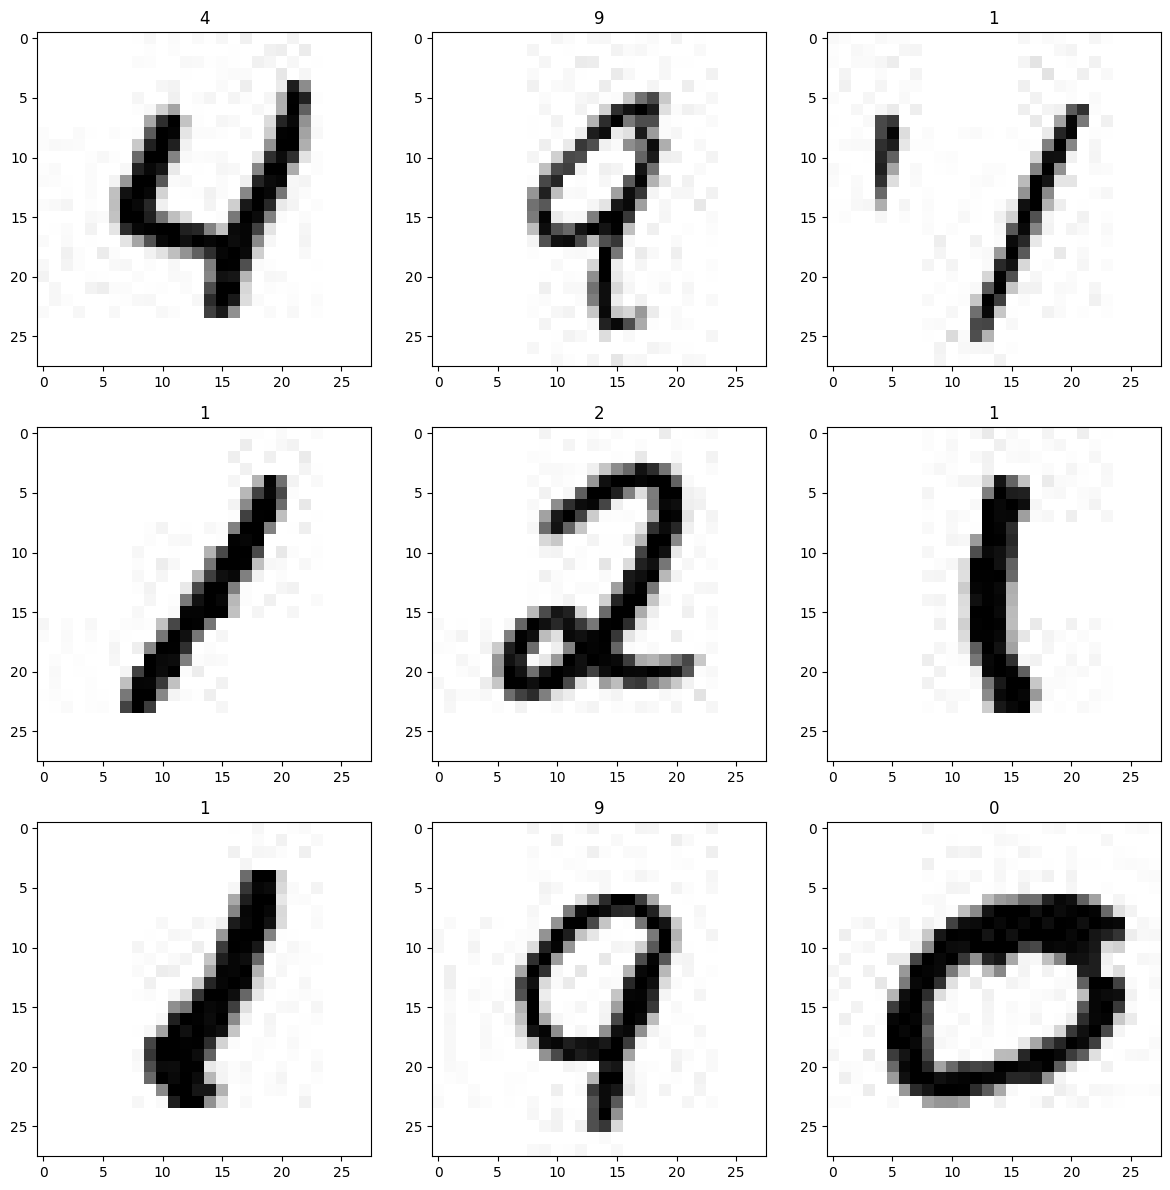

In [6]:
data_visualize(df_train)

In [7]:
# Import label encoder
ll = [9,9,4,0,0,1,2]
print(LabelEncoder().fit_transform(ll))

print(ll)

[4 4 3 0 0 1 2]
[9, 9, 4, 0, 0, 1, 2]


In [8]:
# Check out a random image as well as its prediction
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  np.random.seed(random_state_global+1)
  plt.figure(figsize=(12, 12))
  for iter in range(9):
    ax = plt.subplot(3, 3, iter + 1)
    
    # global seed
    # Setup random integer
    i = np.random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images.iloc[i,:]
    pred_probs = model.predict(tf.reshape(target_image, shape=(1,784)), verbose=0) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(tf.reshape(target_image, shape=(28,28)), cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(f'Pred: {pred_label} with {100*tf.reduce_max(pred_probs):.0f}% accuracy (True: {true_label})', color=color)

    # plt.axis(False)
  plt.tight_layout()

def testingImages(model):
    for i in range(1):
        plot_random_image(model=model, 
                    images=df_test.iloc[:,:-1], 
                    true_labels=df_test.iloc[:,-1], 
                    classes=[0,1,2,4,9])


In [9]:
i = np.random.randint(0, 5)
i

2

In [10]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
    

def inferences(df_model_history, model):
    print(f'Training Accuracy for model: {df_model_history["accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Validation Accuracy for model: {df_model_history["val_accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Test Accuracy for model: {model.evaluate(df_test.iloc[:,:-1], df_test.iloc[:,-1], verbose=0)[1]*100:.2f}%')

    df_model_history.plot(title="Accuracy / Loss vs Epoch", xlabel='Epoch', ylabel='Accuracy / Loss')
    plt.show()

    df_model_history['loss'].plot(title="Average training error vs epochs", xlabel='Epoch', ylabel='Loss')
    plt.show()

def makingPredictionWithCM(model):
    #Predicting one sample
    print('y_prob_a for one sample',model.predict(tf.reshape(df_test.iloc[0,:-1], shape=(1,784)), verbose=0))

    y_true = df_test.iloc[:,-1]
    y_prob_a = model.predict(df_test.iloc[:,:-1], verbose=0)
    y_pred_a = y_prob_a.argmax(axis=1)
    make_confusion_matrix(y_true, y_pred_a, classes=list(map(lambda el: class_l_d_to_r[el], [0,1,2,3,4])))

def showResults(model, history):
    inferences(history, model)
    makingPredictionWithCM(model)
    testingImages(model)

In [11]:
# class StopOnThreshold(keras.callbacks.Callback):
#     def __init__(self, threshold):
#         super(StopOnThreshold, self).__init__()
#         self.threshold = threshold
#         self.previous_error = float('inf')
    
#     def on_epoch_end(self, epoch, logs=None):
#         current_error = logs.get('loss')
#         # print(f'\nEpoch {epoch+1} curent Err:{current_error}, Previous Err:{self.previous_error}')
#         if abs(current_error - self.previous_error) < self.threshold:
#             self.model.stop_training = True
#             print('\n\n********\nThreshold Reached\n********\n')
#         self.previous_error = current_error

class ModelSaving(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # saving the model
        if(self.model.name=='model_b'):
            if((epoch+1)%500==0):
                self.model.save(f'{pathfinal}{self.model.name}_{epoch+1}.h5')
        else:
            self.model.save(f'{pathfinal}{self.model.name}_{epoch+1}.h5')

class HistorySaver(keras.callbacks.Callback):
    def __init__(self):
        super(HistorySaver, self).__init__()
        self.history = {}
# dict_items([('loss', 1.3612865209579468), ('accuracy', 0.46034255623817444), ('val_loss', 1.1157031059265137), ('val_accuracy', 0.6484848856925964)])
    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)

        if(self.model.name=='model_b'):
            if((epoch+1)%500==0):
                pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{epoch+1}.csv', index=False)
        else:
            pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{epoch+1}.csv', index=False)


# create the callbacks

model_saver = ModelSaving()

# not initialize HistorySaver() here initialize inside function 
# stop_on_threshold = StopOnThreshold(threshold=threshold_val)

# This means if for 5 epochs the accuracy has no progress on 
# the validation set then it would stop and store the previous best value.
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=1,
                                                  min_delta=threshold_val,
                                                  mode='min',
                                                  restore_best_weights=True, 
                                                  verbose=1)

# (i) stochastic gradient descent (SGD) algorithm -  (batch_size=1)

In [12]:
# %%script echo skipping
if(i!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_a = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
    keras.layers.Dense(Hidden_layer_IV_N, activation=Hidden_layer_Activation, name="Hidden_layer_IV"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_a')

  # Compile the model
  model_a.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val), 
                  metrics=["accuracy"])

  # Fit the model
  history_a = model_a.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_a,
                        batch_size=batch_size_val_a,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)
  df_model_a_history = pd.DataFrame(history_a.history)
  print('\n\n\n')

  # model_a.summary()
  print(df_model_a_history)

  # saving model and data history
  # model_a.save('model_a.h5')
  # df_model_a_history.to_csv('model_a.csv', index=False)

  # lodaing model and data history
  # model_a = keras.models.load_model('model_a.h5')
  # df_model_a_history = pd.read_csv('model_a.csv')

2023-03-21 14:19:55.767267: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Restoring model weights from the end of the best epoch: 22.
Epoch 23: early stopping




        loss  accuracy  val_loss  val_accuracy
0   0.404623  0.909179  0.196064      0.948617
1   0.161742  0.958718  0.142233      0.961265
2   0.129190  0.963109  0.121793      0.964427
3   0.109023  0.970048  0.111386      0.966271
4   0.096926  0.972420  0.108483      0.968643
5   0.085024  0.975231  0.101647      0.968906
6   0.076396  0.978656  0.090395      0.973386
7   0.066536  0.979359  0.106098      0.966535
8   0.060843  0.981291  0.092093      0.971278
9   0.053349  0.983838  0.087367      0.973913
10  0.048226  0.984892  0.100606      0.970487
11  0.043063  0.987176  0.091126      0.973650
12  0.040509  0.986386  0.084137      0.975494
13  0.034753  0.989899  0.093437      0.972332
14  0.032450  0.990250  0.084457      0.977075
15  0.029906  0.991744  0.089745      0.974967
16  0.028101  0.992534  0.083995      0.977339
17  0.024266  0.994027  0.086640      0.977075
18  0.023411  0.99

Training Accuracy for model: 99.61%
Validation Accuracy for model: 97.55%
Test Accuracy for model: 97.71%


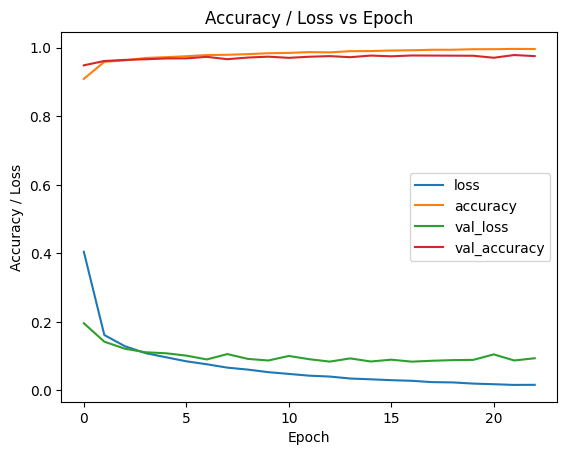

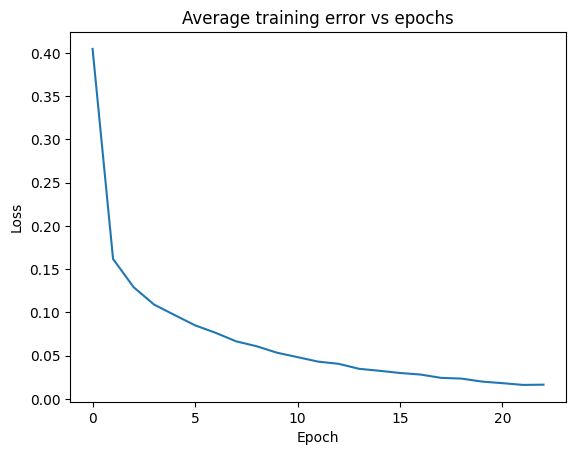

y_prob_a for one sample [[3.0267099e-04 2.7648354e-04 3.4470775e-06 4.9440557e-04 9.9892300e-01]]


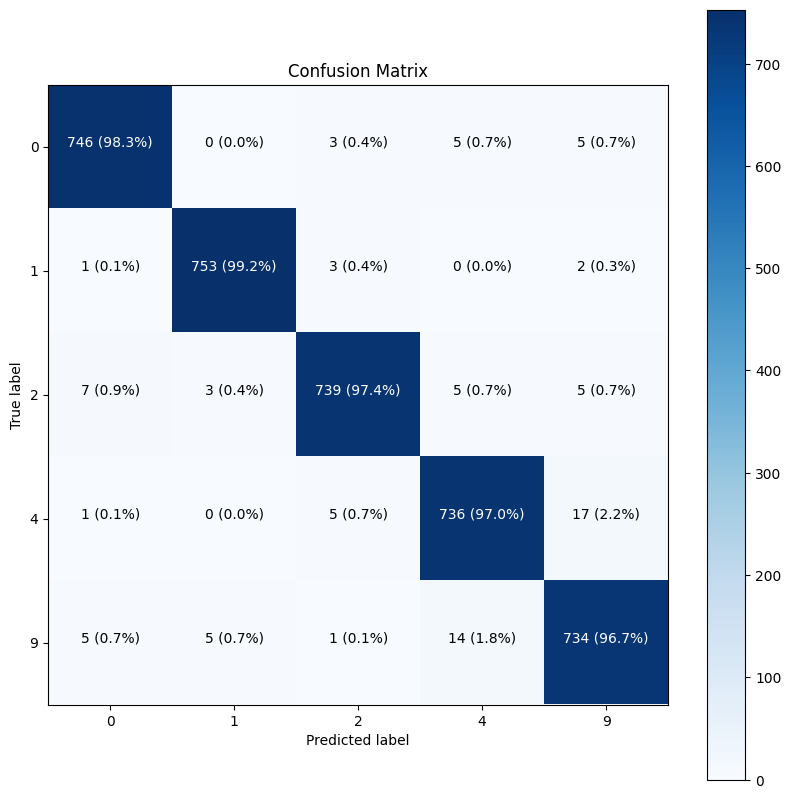

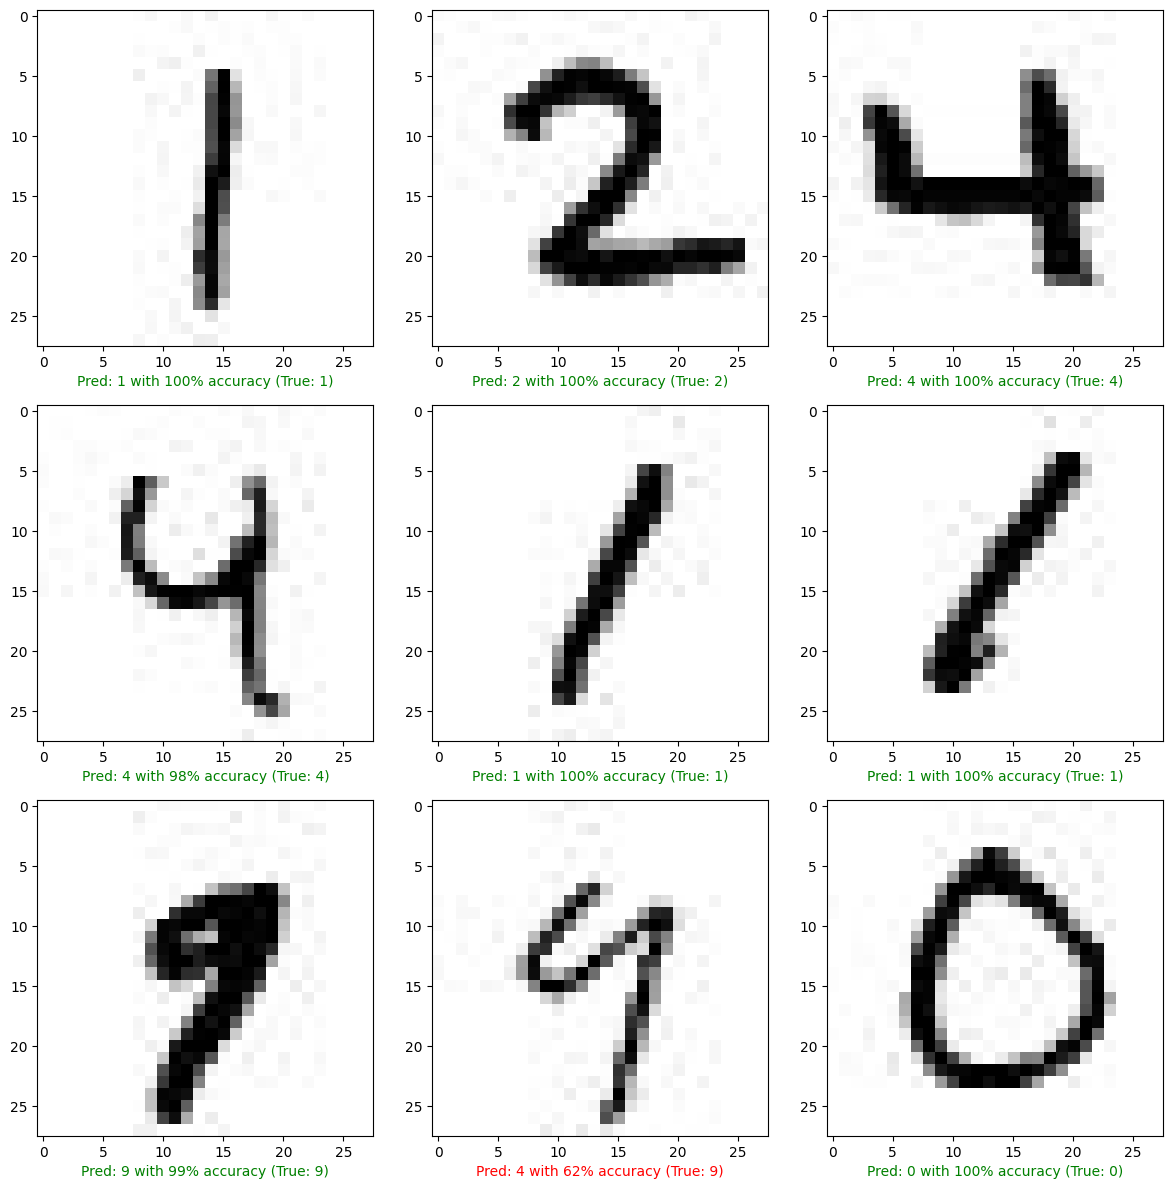

In [13]:
showResults(model_a, df_model_a_history)

# (ii) Batch  gradient  descent  algorithm  (vanilla  gradient  descent)  – (batch_size=total number of training examples),

In [14]:
# %%script echo skipping

if(ii!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_b = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
    keras.layers.Dense(Hidden_layer_IV_N, activation=Hidden_layer_Activation, name="Hidden_layer_IV"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_b')

  # Compile the model
  model_b.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val), 
                  metrics=["accuracy"])



  # Fit the model
  history_b = model_b.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_b,
                        batch_size=batch_size_val_b,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_b_history = pd.DataFrame(history_b.history)

  df_model_b_history.to_csv(f'{pathfinal}model_b_{history_b.epoch[-1]}.csv', index=False)
  model_b.save(f'{pathfinal}model_b_{history_b.epoch[-1]}.h5')

  print('\n\n\n')
  # model_b.summary()
  print(df_model_b_history)

Restoring model weights from the end of the best epoch: 3255.
Epoch 3256: early stopping




          loss  accuracy  val_loss  val_accuracy
0     1.617959  0.215898  1.613766      0.212121
1     1.616420  0.217040  1.612253      0.213702
2     1.614884  0.218709  1.610744      0.215020
3     1.613353  0.220026  1.609239      0.215283
4     1.611825  0.221783  1.607738      0.217128
...        ...       ...       ...           ...
3251  0.471050  0.910496  0.465935      0.915942
3252  0.470950  0.910496  0.465834      0.915942
3253  0.470850  0.910584  0.465734      0.915942
3254  0.470750  0.910584  0.465634      0.916206
3255  0.470650  0.910584  0.465533      0.916206

[3256 rows x 4 columns]


Training Accuracy for model: 91.06%
Validation Accuracy for model: 91.62%
Test Accuracy for model: 91.23%


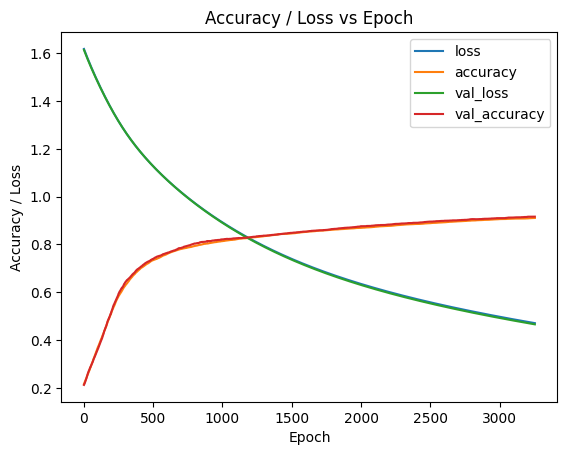

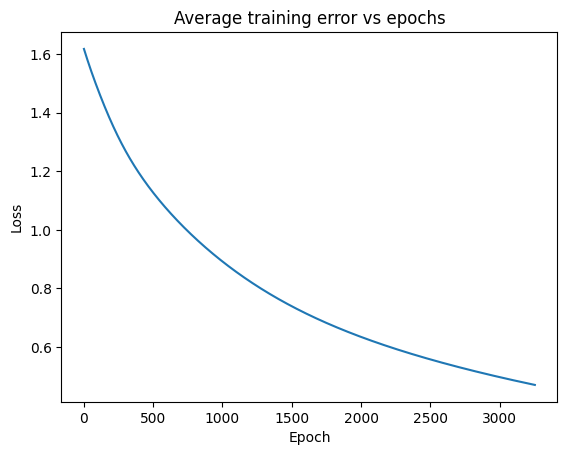

y_prob_a for one sample [[0.02074401 0.08484324 0.05490553 0.25153685 0.5879704 ]]


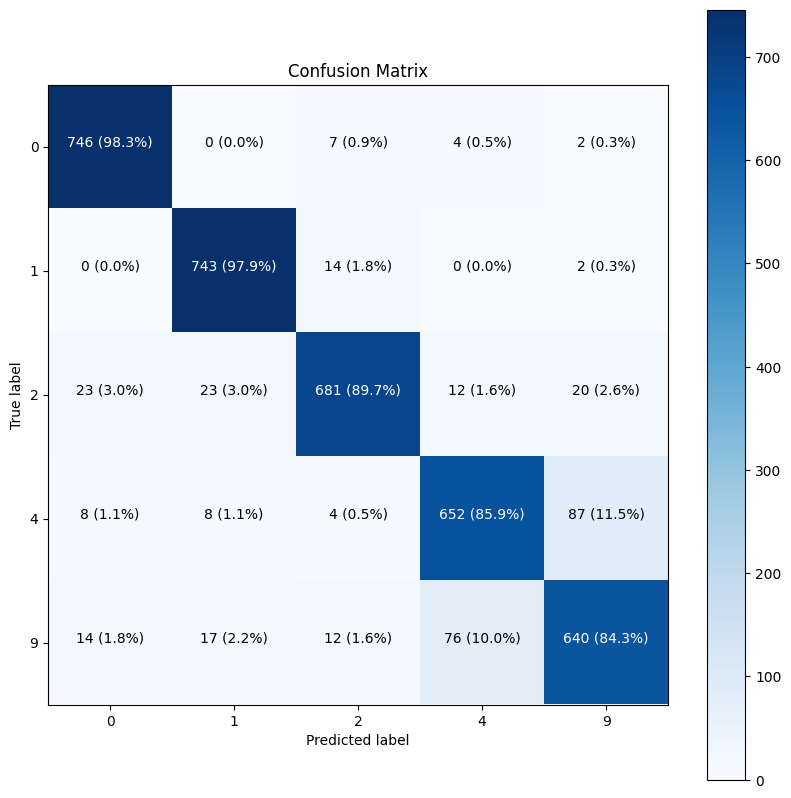

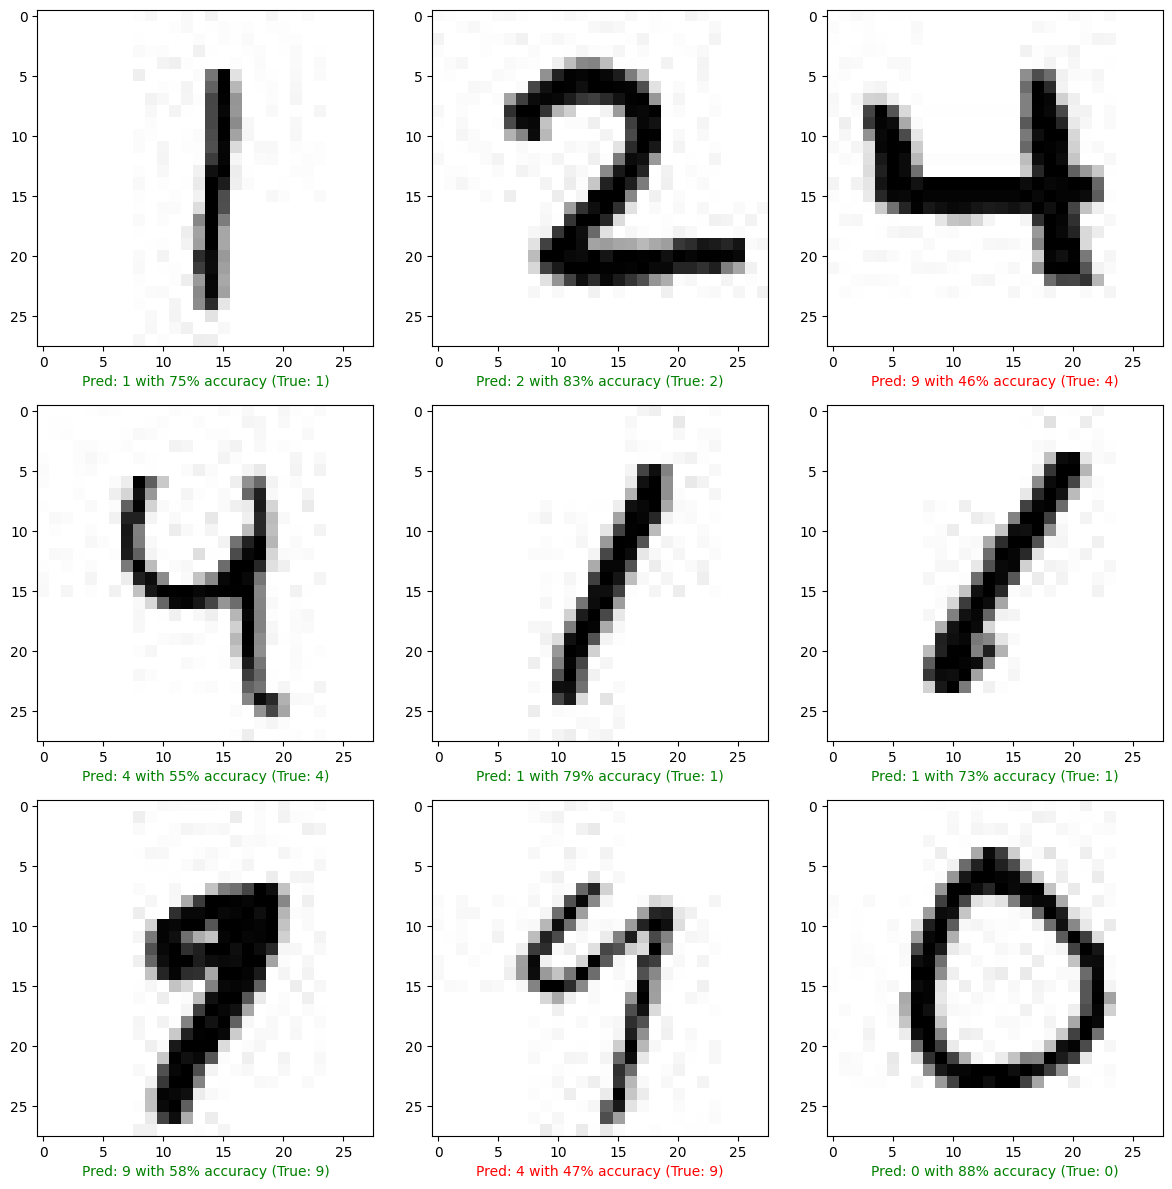

In [15]:
showResults(model_b, df_model_b_history)

# (iii) SGD with momentum (generalized delta rule)  –  (batch_size=1)  ,

In [16]:
# %%script echo skipping

if(iii!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_c = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
    keras.layers.Dense(Hidden_layer_IV_N, activation=Hidden_layer_Activation, name="Hidden_layer_IV"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_c')

  # Compile the model
  model_c.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val, momentum=momentum_val), 
                  metrics=["accuracy"])


  # Fit the model
  history_c = model_c.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_c,
                        batch_size=batch_size_val_c,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_c_history = pd.DataFrame(history_c.history)

  print('\n\n\n')
  # model_c.summary()
  print(df_model_c_history)

Restoring model weights from the end of the best epoch: 9.
Epoch 10: early stopping




       loss  accuracy  val_loss  val_accuracy
0  0.213427  0.933421  0.111024      0.963900
1  0.114652  0.964339  0.110418      0.968379
2  0.089065  0.973210  0.084510      0.974177
3  0.072110  0.976636  0.103234      0.969960
4  0.062534  0.980676  0.079824      0.978393
5  0.050633  0.983838  0.079398      0.977602
6  0.045731  0.984892  0.067126      0.979974
7  0.044697  0.986386  0.078983      0.977602
8  0.035228  0.988230  0.068557      0.981818
9  0.036315  0.987967  0.070728      0.981818


Training Accuracy for model: 98.80%
Validation Accuracy for model: 98.18%
Test Accuracy for model: 97.65%


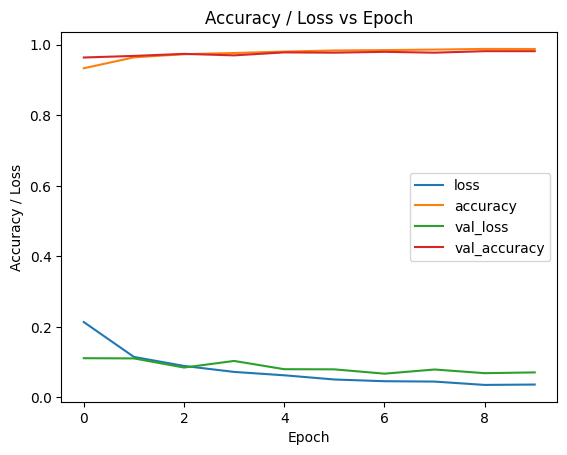

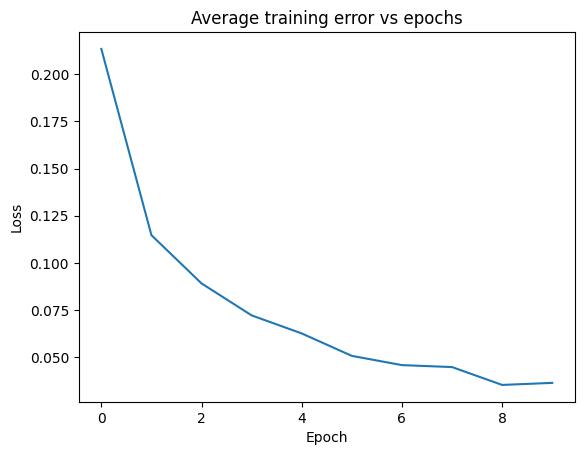

y_prob_a for one sample [[2.7035514e-04 2.9735154e-04 6.6318839e-06 1.6677325e-03 9.9775797e-01]]


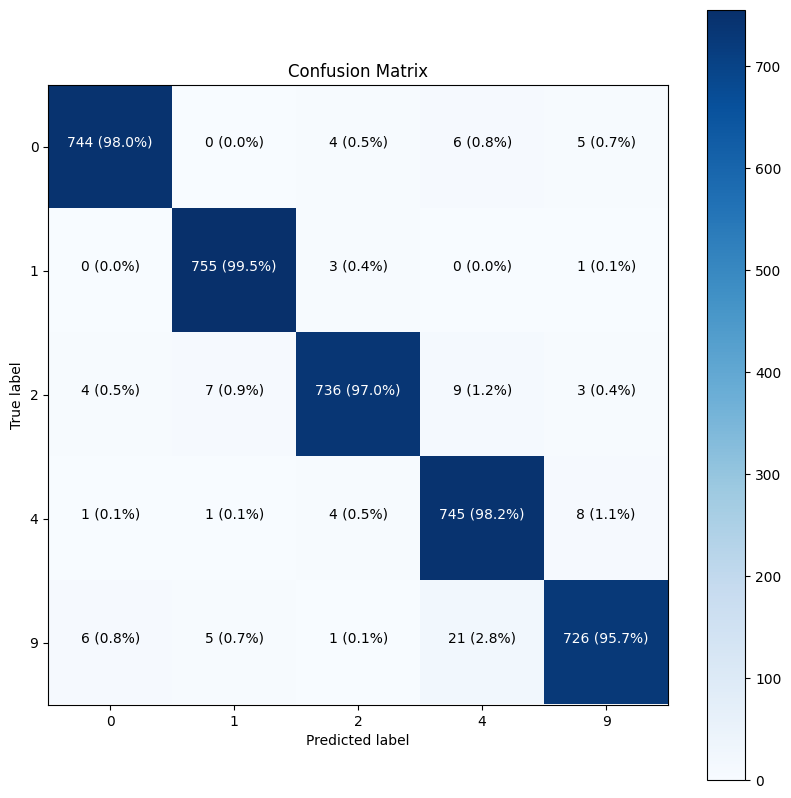

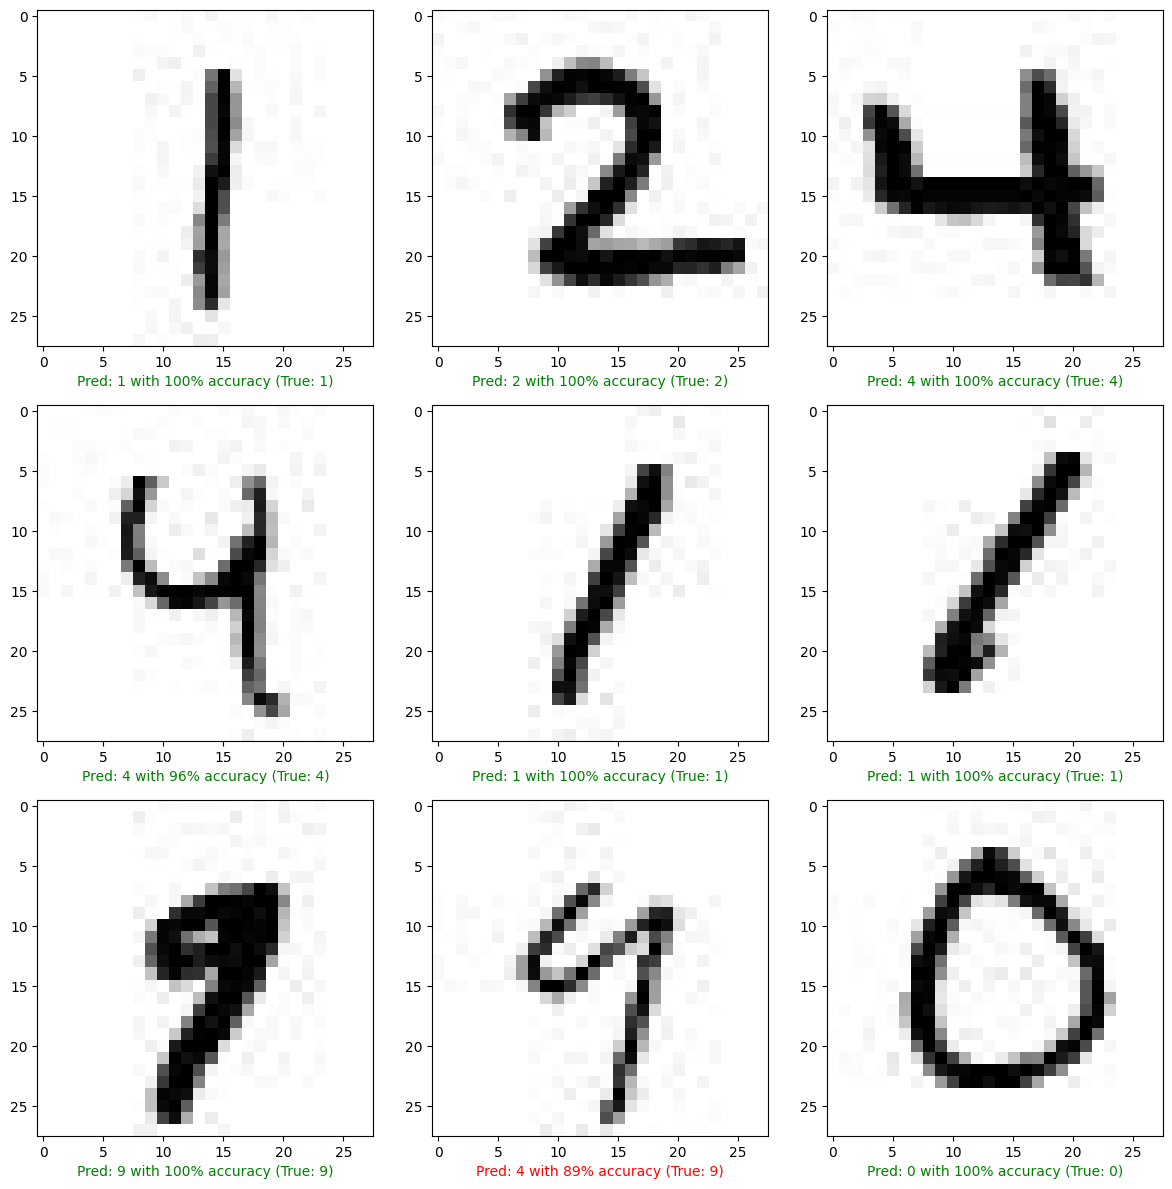

In [17]:
showResults(model_c, df_model_c_history)

# (iv) SGD with momentum (NAG) – (batch_size=1)

In [18]:
# %%script echo skipping

if(iv!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_d = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
    keras.layers.Dense(Hidden_layer_IV_N, activation=Hidden_layer_Activation, name="Hidden_layer_IV"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_d')

  # Compile the model
  model_d.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val, momentum=momentum_val, nesterov=True), 
                  metrics=["accuracy"])

  # Fit the model
  history_d = model_d.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_d,
                        batch_size=batch_size_val_d,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_d_history = pd.DataFrame(history_d.history)

  print('\n\n\n')
  # model_d.summary()
  print(df_model_d_history)

Restoring model weights from the end of the best epoch: 11.
Epoch 12: early stopping




        loss  accuracy  val_loss  val_accuracy
0   0.210030  0.934387  0.132792      0.957839
1   0.109200  0.964076  0.093182      0.970487
2   0.085849  0.972947  0.081242      0.974177
3   0.070414  0.977163  0.092373      0.972596
4   0.063973  0.979710  0.086654      0.975231
5   0.052363  0.983399  0.078082      0.974704
6   0.046549  0.984014  0.068200      0.980764
7   0.038722  0.988230  0.075881      0.978393
8   0.038261  0.987000  0.090339      0.970751
9   0.035050  0.988318  0.073406      0.977602
10  0.026399  0.991217  0.085125      0.977339
11  0.028355  0.990865  0.081232      0.978393


Training Accuracy for model: 99.09%
Validation Accuracy for model: 97.84%
Test Accuracy for model: 97.55%


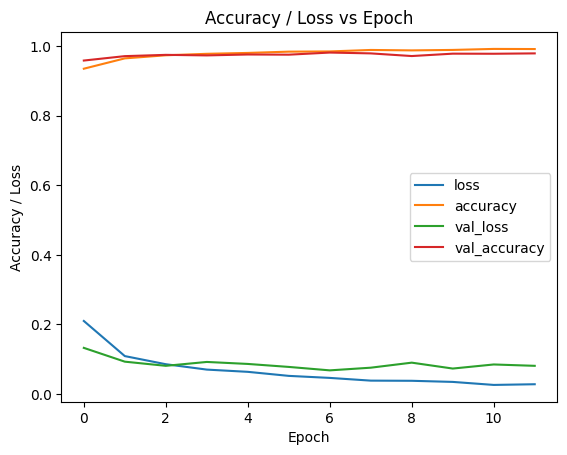

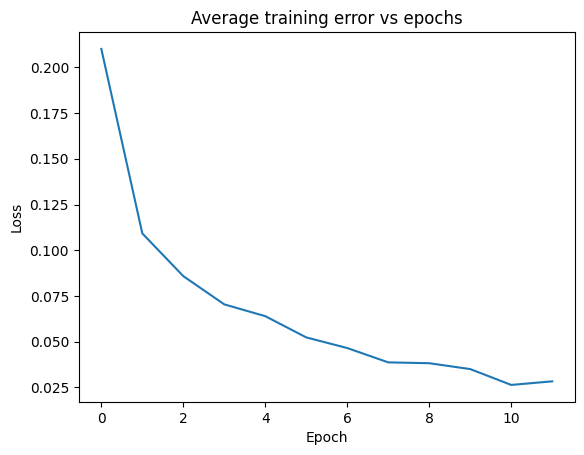

y_prob_a for one sample [[3.5324480e-05 3.6022222e-05 1.2122906e-04 4.4887708e-04 9.9935859e-01]]


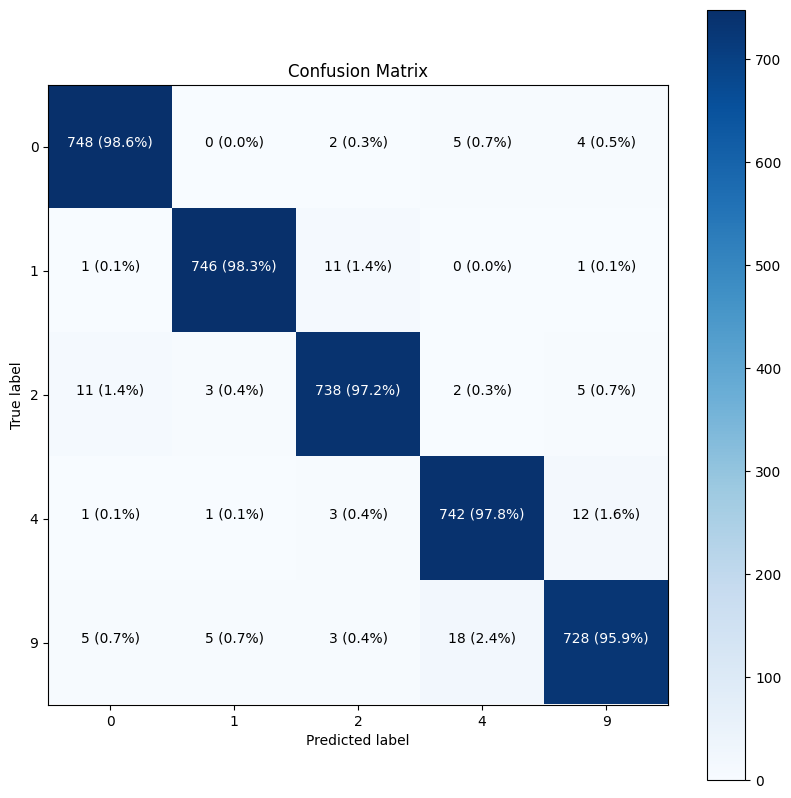

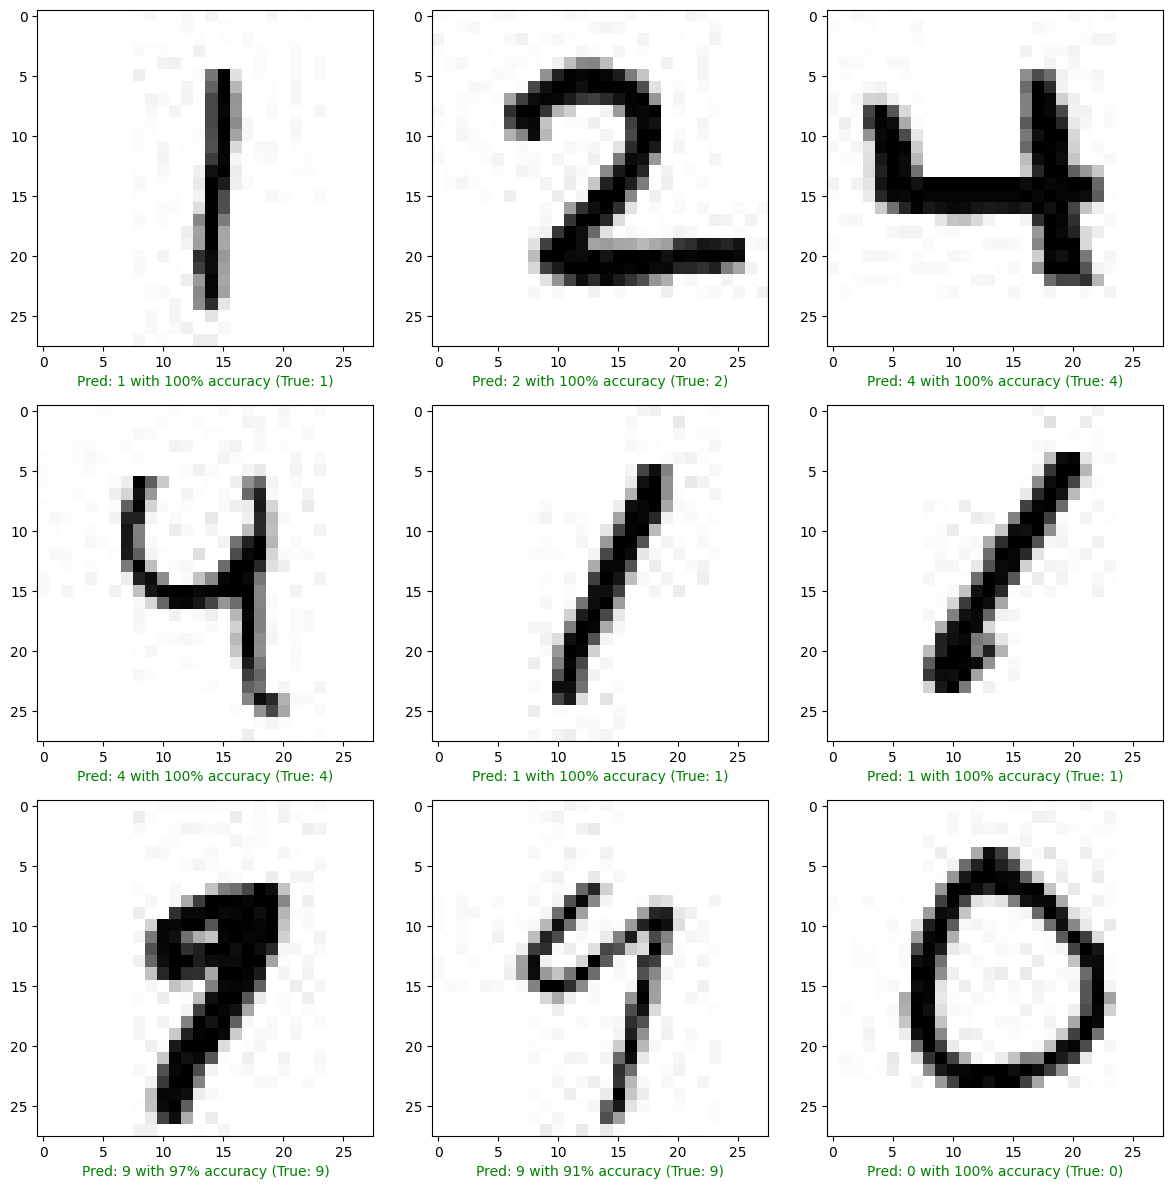

In [19]:
showResults(model_d, df_model_d_history)# 

# (v) AdaGrad – (batch_size=1)

In [20]:
# %%script echo skipping

if(v!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_e = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
    keras.layers.Dense(Hidden_layer_IV_N, activation=Hidden_layer_Activation, name="Hidden_layer_IV"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_e')

  # Compile the model
  model_e.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adagrad(learning_rate=learning_rate_val), 
                  metrics=["accuracy"])


  # Fit the model
  history_e = model_e.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_e,
                        batch_size=batch_size_val_e,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_e_history = pd.DataFrame(history_e.history)

  print('\n\n\n')
  # model_e.summary()
  print(df_model_e_history)

Restoring model weights from the end of the best epoch: 232.
Epoch 233: early stopping




         loss  accuracy  val_loss  val_accuracy
0    0.782790  0.858762  0.514544      0.933860
1    0.434369  0.932894  0.365982      0.945191
2    0.335449  0.939921  0.300370      0.947299
3    0.285220  0.945630  0.263322      0.950725
4    0.254851  0.949144  0.238024      0.953096
..        ...       ...       ...           ...
228  0.070931  0.979183  0.093221      0.972596
229  0.070800  0.979447  0.093314      0.972332
230  0.070678  0.979447  0.093095      0.972596
231  0.070554  0.979886  0.092958      0.972332
232  0.070454  0.979710  0.093124      0.972332

[233 rows x 4 columns]


Training Accuracy for model: 97.97%
Validation Accuracy for model: 97.23%
Test Accuracy for model: 96.92%


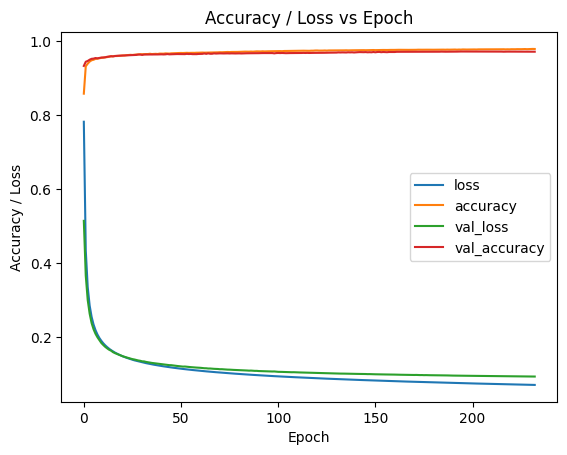

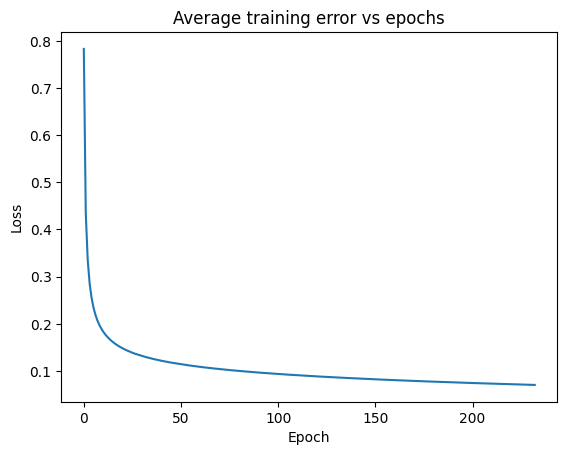

y_prob_a for one sample [[4.5720855e-04 3.6280102e-04 2.6212360e-03 2.5122943e-03 9.9404645e-01]]


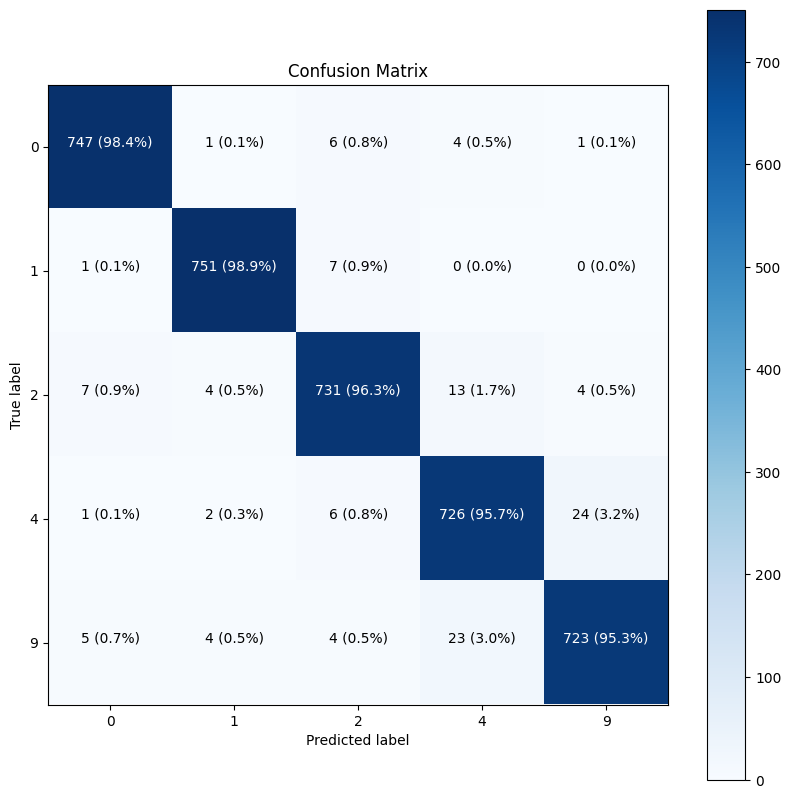

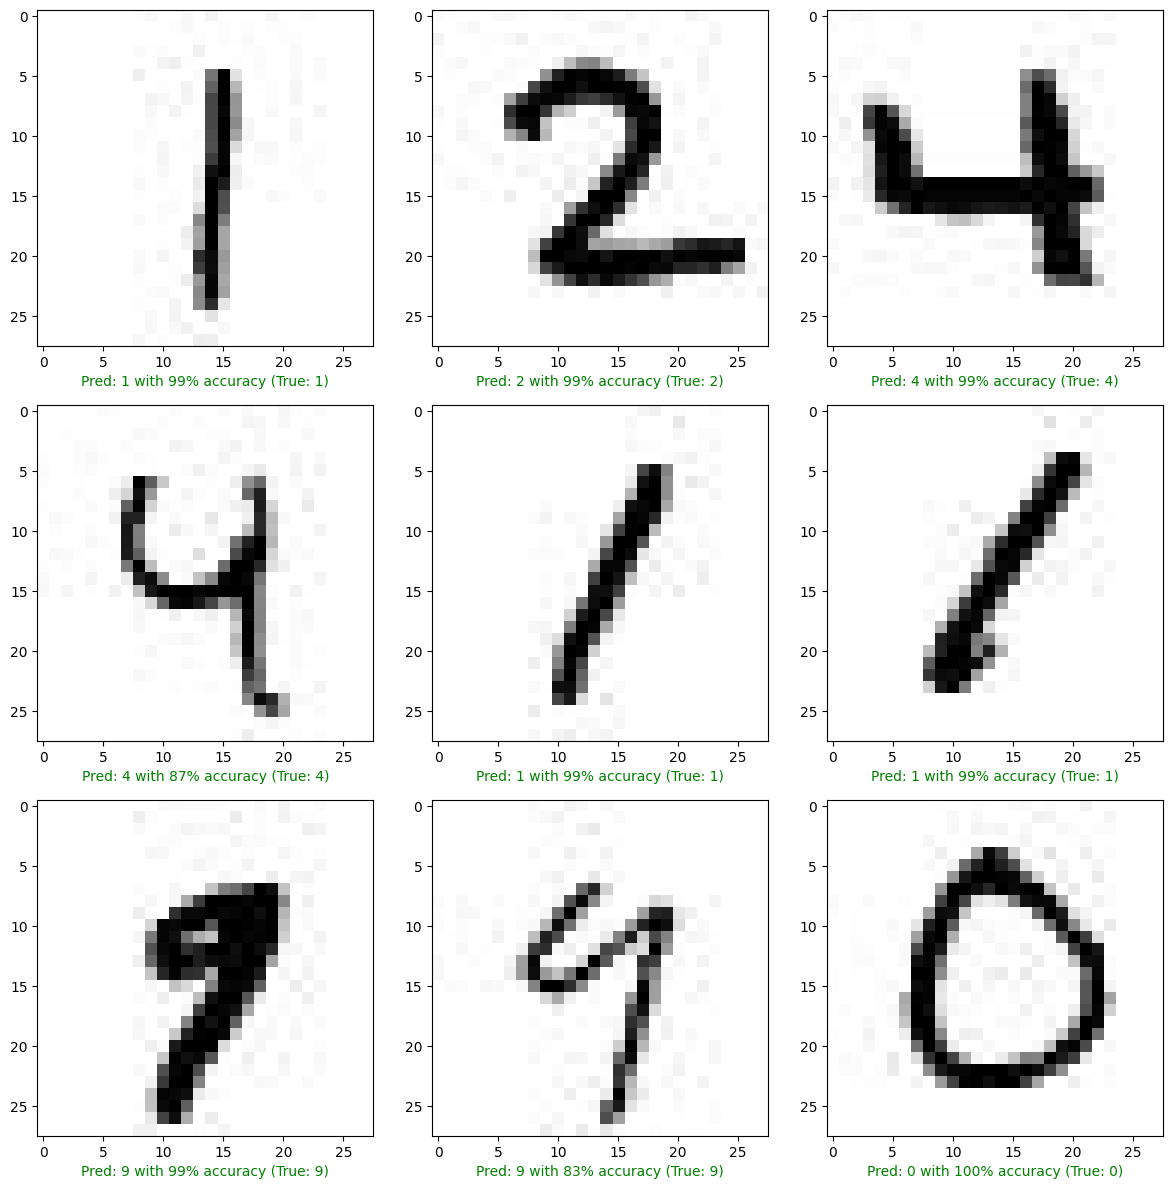

In [21]:
showResults(model_e, df_model_e_history)

# (vi) RMSProp – (batch_size=1)

In [22]:
# %%script echo skipping

if(vi!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_f = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
    keras.layers.Dense(Hidden_layer_IV_N, activation=Hidden_layer_Activation, name="Hidden_layer_IV"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_f')

  # Compile the model
  model_f.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate_val, epsilon=epsilon_val), 
                  metrics=["accuracy"])

  # Fit the model
  history_f = model_f.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_f,
                        batch_size=batch_size_val_f,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_f_history = pd.DataFrame(history_f.history)

  print('\n\n\n')
  # model_f.summary()
  print(df_model_f_history)

Restoring model weights from the end of the best epoch: 7.
Epoch 8: early stopping




       loss  accuracy  val_loss  val_accuracy
0  0.224169  0.940448  0.204065      0.956522
1  0.189393  0.956961  0.156446      0.961001
2  0.169421  0.962494  0.206841      0.955995
3  0.169180  0.965481  0.159553      0.963109
4  0.158271  0.966096  0.163604      0.961001
5  0.153775  0.967677  0.168491      0.965481
6  0.151216  0.968467  0.143869      0.966008
7  0.156228  0.969609  0.176354      0.962582


Training Accuracy for model: 96.96%
Validation Accuracy for model: 96.26%
Test Accuracy for model: 97.02%


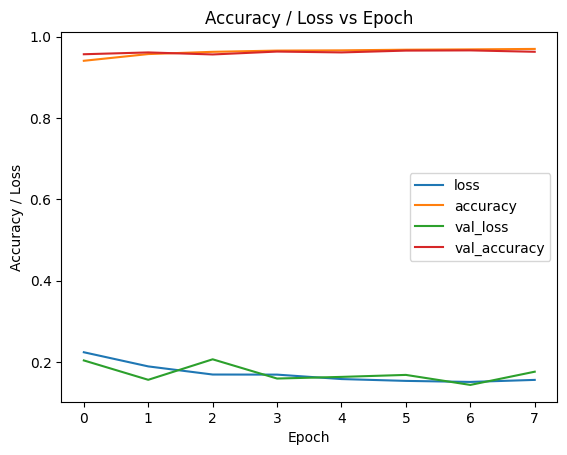

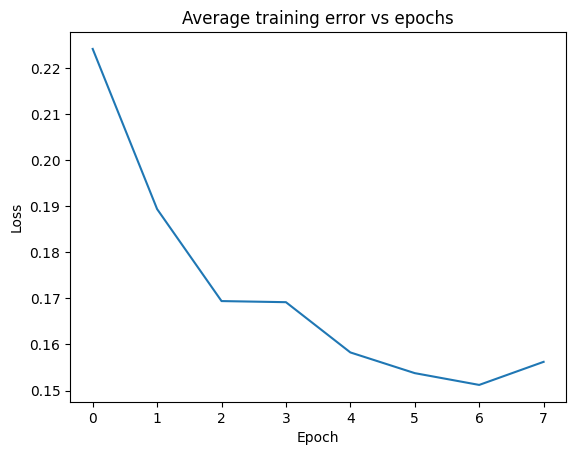

y_prob_a for one sample [[5.2130904e-06 1.6679360e-05 4.3458273e-05 4.1861844e-04 9.9951601e-01]]


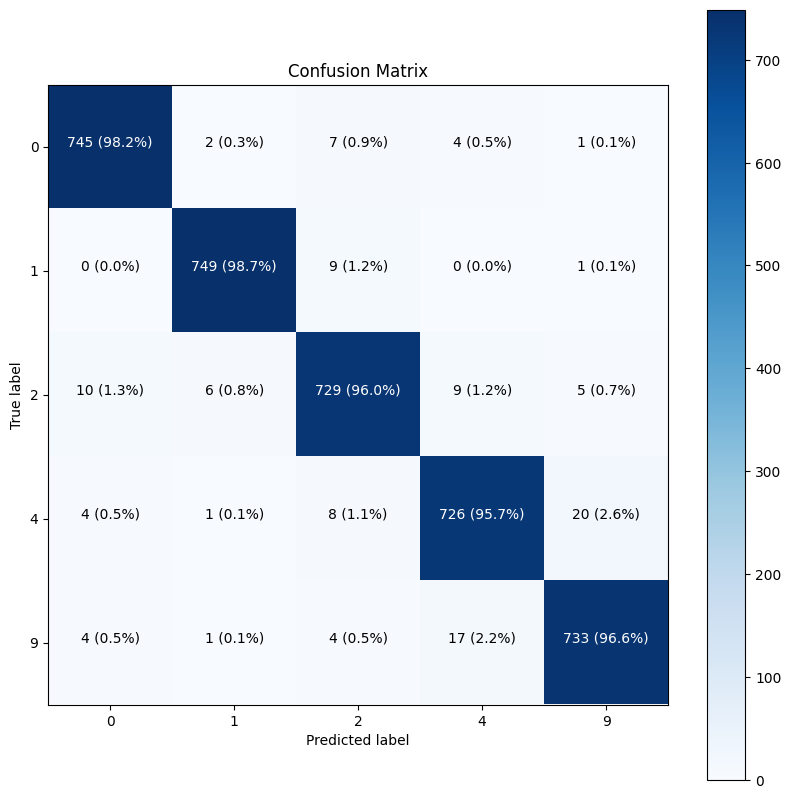

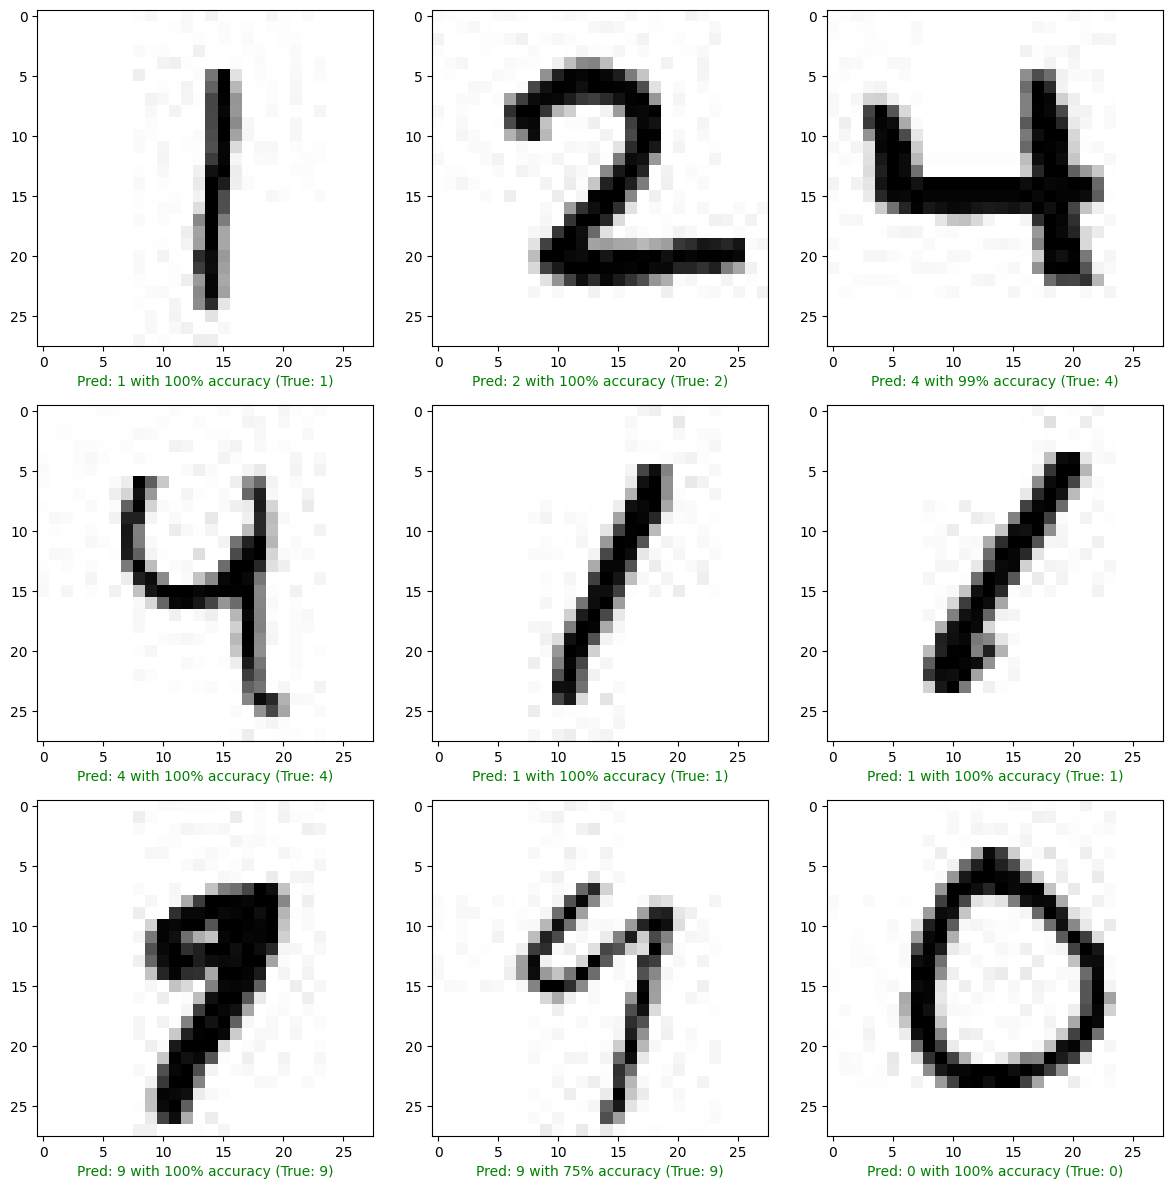

In [23]:
showResults(model_f, df_model_f_history)

# (vii) Adam optimizer – (batch_size=1)

In [24]:
# %%script echo skipping

if(vii!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_g = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
    keras.layers.Dense(Hidden_layer_IV_N, activation=Hidden_layer_Activation, name="Hidden_layer_IV"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_g')

  # Compile the model
  model_g.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val, 
                                                  epsilon=epsilon_val,
                                                  beta_1=beta_1_val,
                                                  beta_2=beta_2_val), 
                  metrics=["accuracy"])

  # Fit the model
  history_g = model_g.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_g,
                        batch_size=batch_size_val_g,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_g_history = pd.DataFrame(history_g.history)

  print('\n\n\n')
  # model_g.summary()
  print(df_model_g_history)

Restoring model weights from the end of the best epoch: 8.
Epoch 9: early stopping




       loss  accuracy  val_loss  val_accuracy
0  0.200276  0.940184  0.137841      0.958893
1  0.116517  0.964603  0.090357      0.973123
2  0.088767  0.972947  0.102868      0.972859
3  0.076916  0.976372  0.095845      0.973386
4  0.063897  0.979974  0.092974      0.972859
5  0.055548  0.982433  0.093334      0.972596
6  0.051037  0.984980  0.089141      0.977339
7  0.042527  0.986649  0.160860      0.960474
8  0.045345  0.986737  0.115359      0.968906


Training Accuracy for model: 98.67%
Validation Accuracy for model: 96.89%
Test Accuracy for model: 95.92%


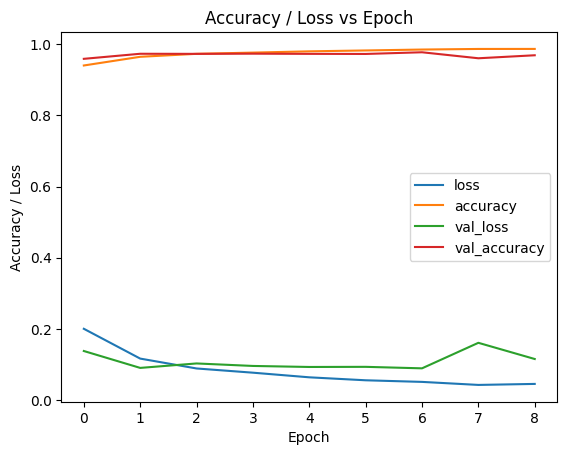

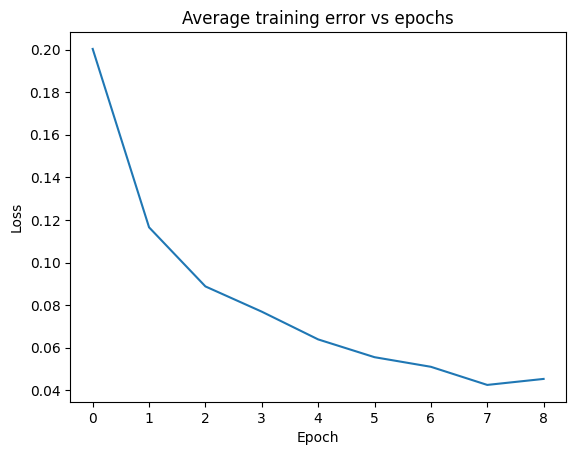

y_prob_a for one sample [[3.9615892e-04 3.8850409e-05 2.6840525e-04 6.9147632e-03 9.9238187e-01]]


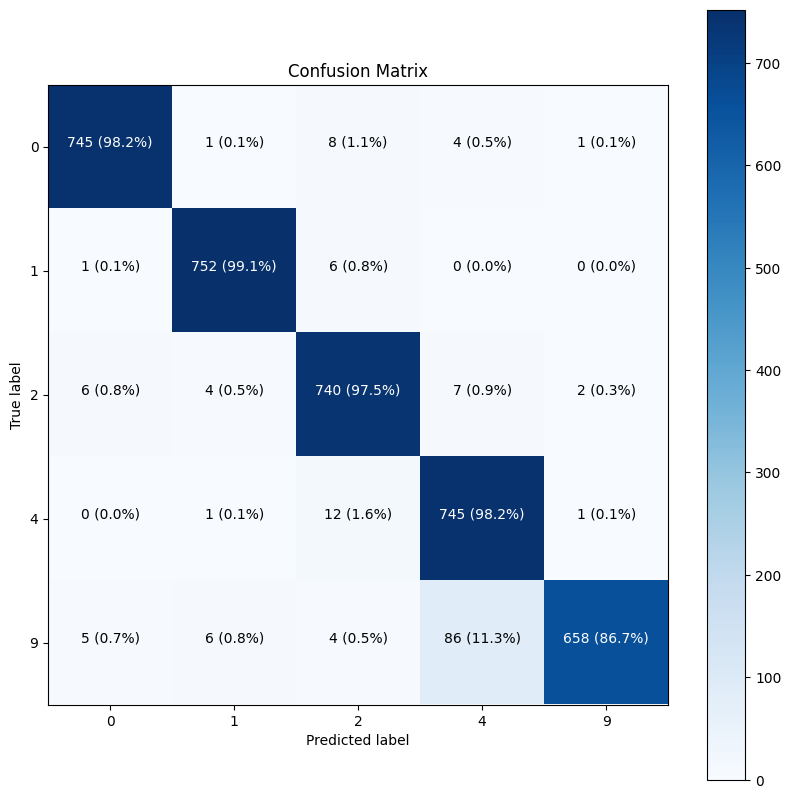

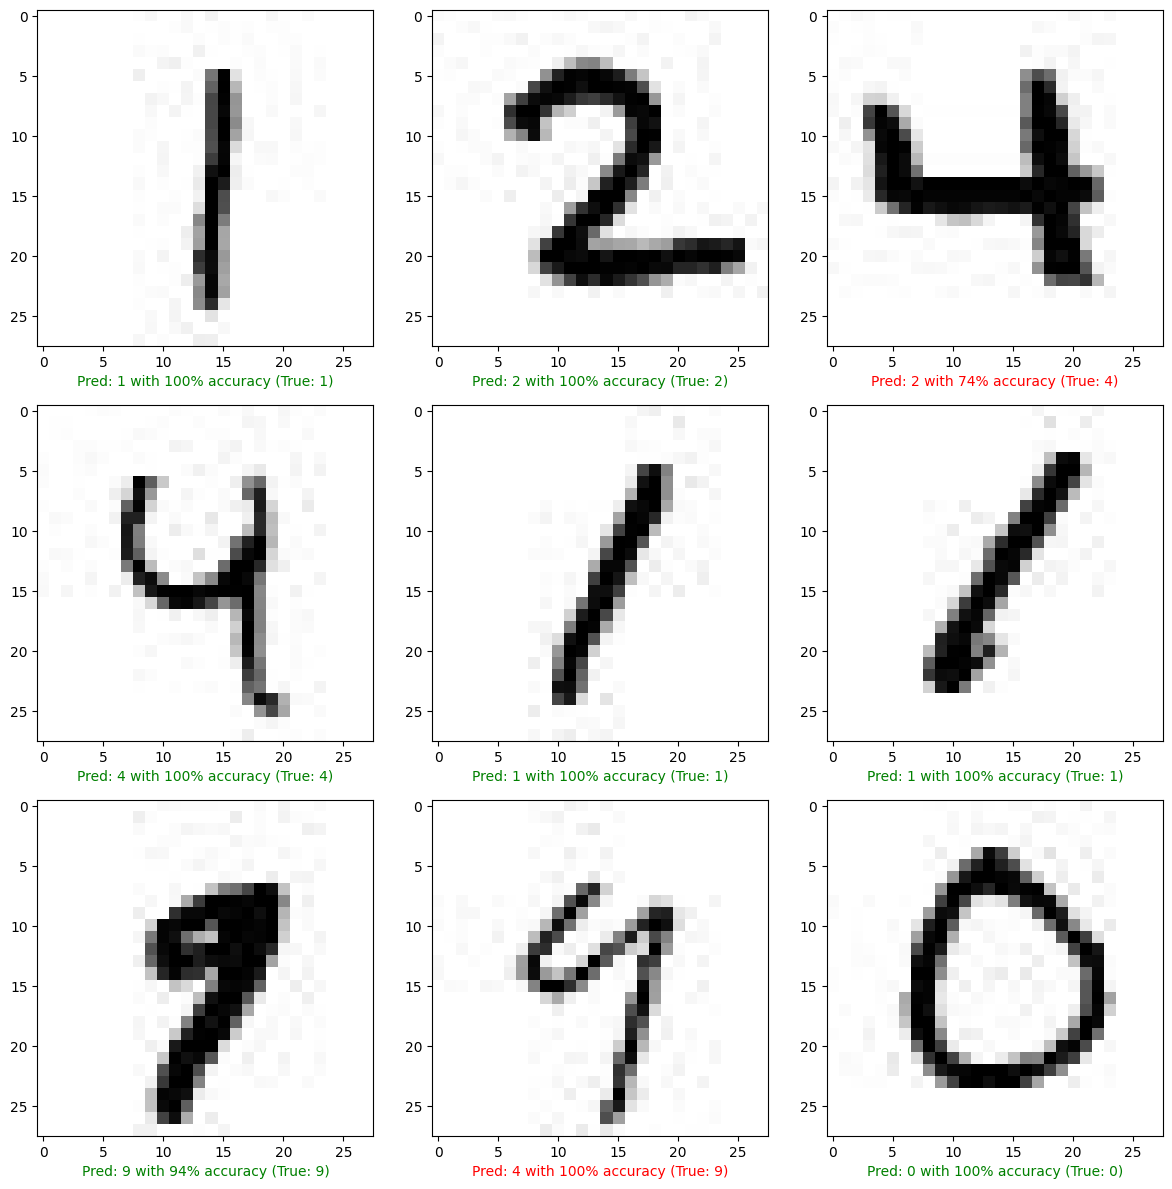

In [25]:
showResults(model_g, df_model_g_history)

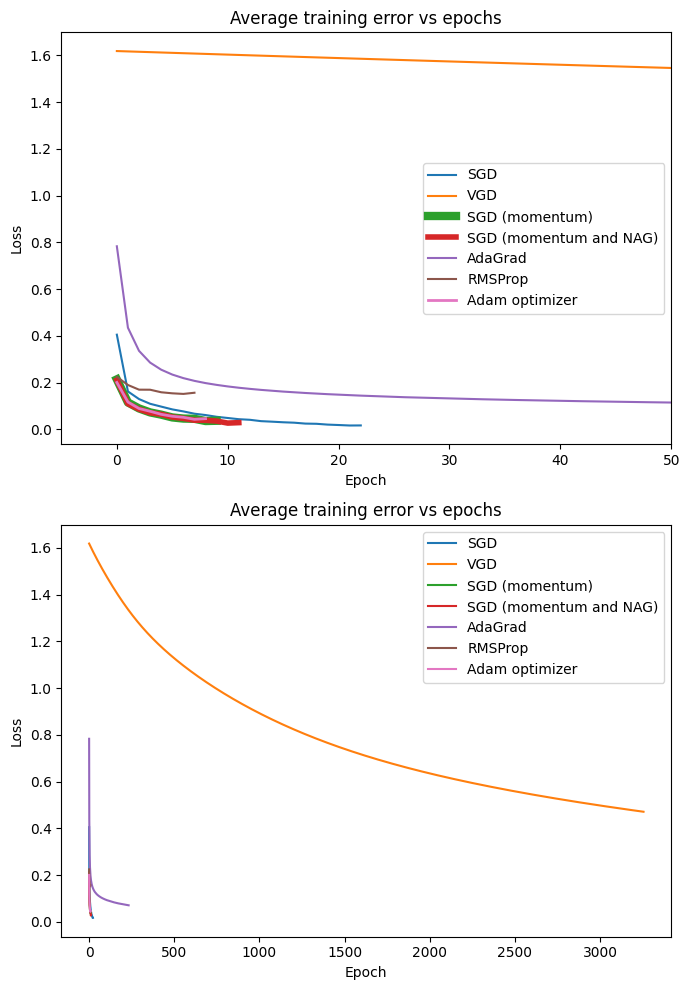

In [26]:
if(al!=''):
  plt.figure(figsize=(7, 10))
  
  plt.subplot(2,1,1)
  plt.plot(df_model_a_history['loss'], label='SGD')
  plt.plot(df_model_b_history['loss'], label='VGD')
  plt.plot(df_model_c_history['loss'], label='SGD (momentum)', linewidth=6)
  plt.plot(df_model_d_history['loss'], label='SGD (momentum and NAG)', linewidth=4)
  plt.plot(df_model_e_history['loss'], label='AdaGrad')
  plt.plot(df_model_f_history['loss'], label='RMSProp')
  plt.plot(df_model_g_history['loss'], label='Adam optimizer', linewidth=2)
  plt.title("Average training error vs epochs")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.xlim([-5, 50])
  plt.legend()

  plt.subplot(2,1,2)
  plt.plot(df_model_a_history['loss'], label='SGD')
  plt.plot(df_model_b_history['loss'], label='VGD')
  plt.plot(df_model_c_history['loss'], label='SGD (momentum)')
  plt.plot(df_model_d_history['loss'], label='SGD (momentum and NAG)')
  plt.plot(df_model_e_history['loss'], label='AdaGrad')
  plt.plot(df_model_f_history['loss'], label='RMSProp')
  plt.plot(df_model_g_history['loss'], label='Adam optimizer')
  plt.title("Average training error vs epochs")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()


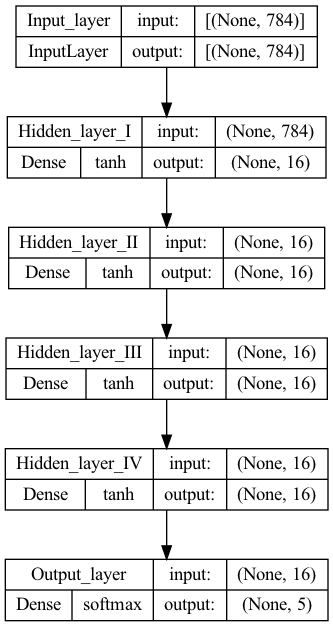

In [27]:
plot_model(model_g, show_shapes=True, show_layer_activations=True)